In [1]:
import sqlite3
import pandas as pd
import sqlalchemy
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np

In [1]:
#import stata_setup
#stata_setup.config("C:/Program Files/Stata17/", "se")

In [3]:
#!pip install --upgrade --user stata_setup
import stata_setup
stata_setup.__version__

'0.1.2'

In [4]:
from pystata import stata

In [5]:
clev_df = pd.read_csv('cleveland.heart.csv')
cal_df = pd.read_csv('california.heart.csv')
hung_df = pd.read_csv('hungary.heart.csv')
switz_df = pd.read_csv('switzerland.heart.csv')

In [6]:
clev_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [7]:
pd.options.display.float_format = "{:,.0f}".format
cal_df['loc'] = 1
clev_df['loc'] = 2
hung_df['loc'] = 3
switz_df['loc'] = 4
#1 California
#2 Cleveland
#3 Hungary
#4 Switzerland
clev_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
count,303,303,303,303,303,303,303,303,303,303,303,299,301,303,303
mean,54,1,3,132,247,0,1,150,0,1,2,1,5,1,2
std,9,0,1,18,52,0,1,23,0,1,1,1,2,1,0
min,29,0,1,94,126,0,0,71,0,0,1,0,3,0,2
25%,48,0,3,120,211,0,0,134,0,0,1,0,3,0,2
50%,56,1,3,130,241,0,1,153,0,1,2,0,3,0,2
75%,61,1,4,140,275,0,2,166,1,2,2,1,7,2,2
max,77,1,4,200,564,1,2,202,1,6,3,3,7,4,2


In [8]:
clev_df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [9]:
clev_df['clas'] = clev_df['num']
clev_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0,2,0
1,67,1,4,160,286,0,2,108,1,2,2,3,3,2,2,2
2,67,1,4,120,229,0,2,129,1,3,2,2,7,1,2,1
3,37,1,3,130,250,0,0,187,0,4,3,0,3,0,2,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1,2,1
299,68,1,4,144,193,1,0,141,0,3,2,2,7,2,2,2
300,57,1,4,130,131,0,0,115,1,1,2,1,7,3,2,3
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1,2,1


In [10]:
clev_df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [11]:
clev_df['num'] = np.where(clev_df['num'] > 0, 1, clev_df['num'])
clev_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0,2,0
1,67,1,4,160,286,0,2,108,1,2,2,3,3,1,2,2
2,67,1,4,120,229,0,2,129,1,3,2,2,7,1,2,1
3,37,1,3,130,250,0,0,187,0,4,3,0,3,0,2,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1,2,1
299,68,1,4,144,193,1,0,141,0,3,2,2,7,1,2,2
300,57,1,4,130,131,0,0,115,1,1,2,1,7,1,2,3
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1,2,1


In [12]:
pd.crosstab(clev_df['num'], clev_df['clas'])

clas,0,1,2,3,4
num,,,,,
0,164,0,0,0,0
1,0,55,36,35,13


In [13]:
cal_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2,1
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,1
2,60,1,4,132,218,0,1,140,1,2,3,NaN,NaN,2,1
3,55,1,4,142,228,0,1,149,1,2,1,NaN,NaN,1,1
4,66,1,3,110,213,1,2,99,1,1,2,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2,1
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [14]:
cal_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
count,200,200,200,144,193,193,200,147,147,144,98,2,34,200,200
mean,59,1,4,134,179,0,1,123,1,1,2,0,6,2,1
std,8,0,1,22,114,0,1,22,0,1,1,0,1,1,0
min,35,0,1,0,0,0,0,69,0,-0,1,0,3,0,1
25%,55,1,3,120,0,0,0,109,0,0,2,0,6,0,1
50%,60,1,4,130,216,0,1,120,1,2,2,0,7,1,1
75%,64,1,4,147,258,1,1,140,1,2,3,0,7,3,1
max,77,1,4,190,458,1,2,180,1,4,3,0,7,4,1


In [15]:
cal_df['num'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [16]:
cal_df['clas'] = cal_df['num']
cal_df['num'] = np.where(cal_df['num'] > 0, 1, cal_df['num'])
cal_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,1,1,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,1,0
2,60,1,4,132,218,0,1,140,1,2,3,NaN,NaN,1,1,2
3,55,1,4,142,228,0,1,149,1,2,1,NaN,NaN,1,1,1
4,66,1,3,110,213,1,2,99,1,1,2,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1,1,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,1,1,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [17]:
cal_df['chol'].replace(0, np.nan, inplace=True)
cal_df['trestbps'].replace(0, np.nan, inplace=True)
cal_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
count,200,200,200,143,144,193,200,147,147,144,98,2,34,200,200,200
mean,59,1,4,135,240,0,1,123,1,1,2,0,6,1,1,2
std,8,0,1,18,53,0,1,22,0,1,1,0,1,0,0,1
min,35,0,1,96,100,0,0,69,0,-0,1,0,3,0,1,0
25%,55,1,3,120,208,0,0,109,0,0,2,0,6,0,1,0
50%,60,1,4,130,228,0,1,120,1,2,2,0,7,1,1,1
75%,64,1,4,148,271,1,1,140,1,2,3,0,7,1,1,3
max,77,1,4,190,458,1,2,180,1,4,3,0,7,1,1,4


In [18]:
hung_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
count,294,294,294,293,271,286,293,293,293,294,104,3,28,294,294
mean,48,1,3,133,251,0,0,139,0,1,2,0,6,0,3
std,8,0,1,18,68,0,0,24,0,1,0,0,2,0,0
min,28,0,1,92,85,0,0,82,0,0,1,0,3,0,3
25%,42,0,2,120,209,0,0,122,0,0,2,0,5,0,3
50%,49,1,3,130,243,0,0,140,0,0,2,0,6,0,3
75%,54,1,4,140,282,0,0,155,1,1,2,0,7,1,3
max,66,1,4,200,603,1,2,190,1,5,3,0,7,1,3


In [19]:
hung_df['num'].value_counts()

0    188
1    106
Name: num, dtype: int64

In [20]:
hung_df['clas'] = np.nan
hung_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,28,1,2,130,132,0,2,185,0,0,NaN,NaN,NaN,0,3,NaN
1,29,1,2,120,243,0,0,160,0,0,NaN,NaN,NaN,0,3,NaN
2,29,1,2,140,NaN,0,0,170,0,0,NaN,NaN,NaN,0,3,NaN
3,30,0,1,170,237,0,1,170,0,0,NaN,NaN,6,0,3,NaN
4,31,0,2,100,219,0,1,150,0,0,NaN,NaN,NaN,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2,NaN,NaN,NaN,1,3,NaN
290,54,0,3,130,294,0,1,100,1,0,2,NaN,NaN,1,3,NaN
291,56,1,4,155,342,1,0,150,1,3,2,NaN,NaN,1,3,NaN
292,58,0,2,180,393,0,0,110,1,1,2,NaN,7,1,3,NaN


In [21]:
switz_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
count,123,123,123,121,123,48,122,122,122,117,106,5,71,123,123
mean,55,1,4,130,0,0,0,122,0,1,2,2,6,2,4
std,9,0,1,23,0,0,1,26,0,1,1,1,2,1,0
min,32,0,1,80,0,0,0,60,0,-3,1,1,3,0,4
25%,51,1,4,115,0,0,0,104,0,0,1,1,3,1,4
50%,56,1,4,125,0,0,0,121,0,0,2,2,7,2,4
75%,62,1,4,145,0,0,1,140,1,2,2,2,7,3,4
max,74,1,4,200,0,1,2,182,1,4,3,2,7,4,4


In [22]:
switz_df['chol'].replace(0, np.nan, inplace=True)
switz_df['clas'] = switz_df['num']
switz_df['num'] = np.where(switz_df['num'] > 0, 1, switz_df['num'])
switz_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,32,1,1,95,NaN,NaN,0,127,0,1,1,NaN,NaN,1,4,1
1,34,1,4,115,NaN,NaN,NaN,154,0,0,1,NaN,NaN,1,4,1
2,35,1,4,NaN,NaN,NaN,0,130,1,NaN,NaN,NaN,7,1,4,3
3,36,1,4,110,NaN,NaN,0,125,1,1,2,NaN,6,1,4,1
4,38,0,4,105,NaN,NaN,0,166,0,3,1,NaN,NaN,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,NaN,0,1,92,1,0,2,NaN,7,1,4,1
119,70,1,4,140,NaN,1,0,157,1,2,2,NaN,7,1,4,3
120,72,1,3,160,NaN,NaN,2,114,0,2,2,2,NaN,0,4,0
121,73,0,3,160,NaN,0,1,121,0,0,1,NaN,3,1,4,1


In [23]:
switz_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
count,123,123,123,121,0,48,122,122,122,117,106,5,71,123,123,123
mean,55,1,4,130,NaN,0,0,122,0,1,2,2,6,1,4,2
std,9,0,1,23,NaN,0,1,26,0,1,1,1,2,0,0,1
min,32,0,1,80,NaN,0,0,60,0,-3,1,1,3,0,4,0
25%,51,1,4,115,NaN,0,0,104,0,0,1,1,3,1,4,1
50%,56,1,4,125,NaN,0,0,121,0,0,2,2,7,1,4,2
75%,62,1,4,145,NaN,0,1,140,1,2,2,2,7,1,4,3
max,74,1,4,200,NaN,1,2,182,1,4,3,2,7,1,4,4


In [24]:
pd.crosstab(switz_df['num'], switz_df['clas'])

clas,0,1,2,3,4
num,,,,,
0,8,0,0,0,0
1,0,48,32,30,5


In [25]:
all_df = pd.concat([cal_df, clev_df, hung_df, switz_df], ignore_index=True)
all_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,1,1,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,1,0
2,60,1,4,132,218,0,1,140,1,2,3,NaN,NaN,1,1,2
3,55,1,4,142,228,0,1,149,1,2,1,NaN,NaN,1,1,1
4,66,1,3,110,213,1,2,99,1,1,2,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70,1,4,115,NaN,0,1,92,1,0,2,NaN,7,1,4,1
916,70,1,4,140,NaN,1,0,157,1,2,2,NaN,7,1,4,3
917,72,1,3,160,NaN,NaN,2,114,0,2,2,2,NaN,0,4,0
918,73,0,3,160,NaN,0,1,121,0,0,1,NaN,3,1,4,1


In [26]:
all_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
count,920,920,920,860,718,830,918,865,865,858,611,309,434,920,920,626
mean,54,1,3,132,247,0,1,138,0,1,2,1,5,1,2,1
std,9,0,1,19,59,0,1,26,0,1,1,1,2,0,1,1
min,28,0,1,80,85,0,0,60,0,-3,1,0,3,0,1,0
25%,47,1,3,120,210,0,0,120,0,0,1,0,3,0,2,0
50%,54,1,4,130,240,0,0,140,0,0,2,0,6,1,2,1
75%,60,1,4,140,277,0,1,157,1,2,2,1,7,1,3,2
max,77,1,4,200,603,1,2,202,1,6,3,3,7,1,4,4


In [27]:
all_df.to_excel('all_python_output.xlsx')

In [28]:
stata.run('clear')
stata.pdataframe_to_data(all_df, True)
stata.run('sum')


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |        920    53.51087    9.424685         28         77
         sex |        920    .7891304    .4081478          0          1
          cp |        920        3.25    .9309688          1          4
    trestbps |        860     132.286    18.53618         80        200
        chol |        718    246.8329    58.52706         85        603
-------------+---------------------------------------------------------
         fbs |        830    .1662651    .3725429          0          1
     restecg |        918    .6045752    .8058272          0          2
     thalach |        865    137.5457    25.92628         60        202
       exang |        865    .3895954    .4879406          0          1
     oldpeak |        858    .8787879    1.091226       -2.6        6.2
-------------+-------------------------------------------------

In [29]:
stata.run('''
label define loc 1"California" 2"Cleveland" 3"Hungary" 4"Switzerland"
label values loc loc
label define cp 1"Typical angina" 2"atypical angina" 3"Non-anginal pain" 4"asymptomatic" 0"asymptomatic", replace
replace cp=0 if cp==4
label values cp cp
label define sex 0"Female" 1"Male"
label values sex sex
label define fbs 0"Normal" 1"High"
label values fbs fbs
label define restecg 0"Normal" 1"ST-T wave abnorm" 2"LVH"
label values restecg restecg
label define slope 1"upsloping" 2"flat" 3"downsloping"
label values slope slope
label define thal 3"Normal" 6"Fixed defect" 7"Reversable defect"
label values thal thal
label define num 0"No heart disease" 1"Heart disease"
label values num num
label define exang 0"Absent" 1"Present"
label values exang exang
''',)


. 
. label define loc 1"California" 2"Cleveland" 3"Hungary" 4"Switzerland"

. label values loc loc

. label define cp 1"Typical angina" 2"atypical angina" 3"Non-anginal pain" 4"as
> ymptomatic" 0"asymptomatic", replace

. replace cp=0 if cp==4
(496 real changes made)

. label values cp cp

. label define sex 0"Female" 1"Male"

. label values sex sex

. label define fbs 0"Normal" 1"High"

. label values fbs fbs

. label define restecg 0"Normal" 1"ST-T wave abnorm" 2"LVH"

. label values restecg restecg

. label define slope 1"upsloping" 2"flat" 3"downsloping"

. label values slope slope

. label define thal 3"Normal" 6"Fixed defect" 7"Reversable defect"

. label values thal thal

. label define num 0"No heart disease" 1"Heart disease"

. label values num num

. label define exang 0"Absent" 1"Present"

. label values exang exang

. 


In [30]:
stata.run("melogit num age chol i.sex i.cp trestbps i.restecg i.exang||loc:, or") 
#odds ratios reported for presence of heart disease dependent variable
# i. forces stata to process as categorical data
# reference groups sex = female, cp = asymptomatic, restecg = normal, exang = none


Fitting fixed-effects model:

Iteration 0:   log likelihood =  -297.9934  
Iteration 1:   log likelihood = -293.51154  
Iteration 2:   log likelihood = -293.49378  
Iteration 3:   log likelihood = -293.49377  

Refining starting values:

Grid node 0:   log likelihood = -297.97346

Fitting full model:

Iteration 0:   log likelihood = -297.97346  (not concave)
Iteration 1:   log likelihood = -296.94344  (not concave)
Iteration 2:   log likelihood = -295.91329  (not concave)
Iteration 3:   log likelihood = -294.69263  (not concave)
Iteration 4:   log likelihood = -294.08168  (not concave)
Iteration 5:   log likelihood = -293.80776  (not concave)
Iteration 6:   log likelihood = -293.56304  (not concave)
Iteration 7:   log likelihood = -293.51293  (not concave)
Iteration 8:   log likelihood = -293.50286  (not concave)
Iteration 9:   log likelihood = -293.50084  (not concave)
Iteration 10:  log likelihood = -293.50003  (not concave)
Iteration 11:  log likelihood = -293.49987  (not concave)


In [31]:
%%stata
tab cp num, row


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

                 |          num
              cp | No heart   Heart dis |     Total
-----------------+----------------------+----------
    asymptomatic |       104        392 |       496 
                 |     20.97      79.03 |    100.00 
-----------------+----------------------+----------
  Typical angina |        26         20 |        46 
                 |     56.52      43.48 |    100.00 
-----------------+----------------------+----------
 atypical angina |       150         24 |       174 
                 |     86.21      13.79 |    100.00 
-----------------+----------------------+----------
Non-anginal pain |       131         73 |       204 
                 |     64.22      35.78 |    100.00 
-----------------+----------------------+----------
           Total |       411        509 |       920 
                 |     44.67      55.33 |    100.00 


In [32]:
all_df['cp'].value_counts()

4    496
3    204
2    174
1     46
Name: cp, dtype: int64

In [33]:
pd.crosstab(all_df['cp'], all_df['num'])

num,0,1
cp,,
1,26,20
2,150,24
3,131,73
4,104,392


In [34]:
engine = sqlalchemy.create_engine('sqlite:///final_project.db')

In [35]:
%load_ext sql
%sql sqlite:///final_project.db

'Connected: @final_project.db'

In [36]:
#create database and cursor
conn = sqlite3.connect("final_project.db")
c = conn.cursor()
c.execute("DROP TABLE IF EXISTS all_table");
conn.commit()

In [37]:
%%sql
DROP TABLE IF EXISTS all_table;
CREATE TABLE all_table (
    ID INTEGER NOT NULL PRIMARY KEY,
    age INTERGER CHECK (age >=18 AND age < 120),
    sex INTERGER CHECK (sex >= 0 AND sex <=1),
    cp INTERGER CHECK (cp >= 1 AND cp <=4),
    trestbps INTERGER CHECK (trestbps >50 AND trestbps <300),
    chol INTERGER CHECK (chol >0),
    fbs INTERGER CHECK (fbs >= 0 AND fbs <=1),
    restecg INTERGER CHECK (restecg >= 0 AND restecg <=2),
    thalach INTERGER CHECK (thalach >30),
    exang INTERGER CHECK (exang >= 0 AND exang <=1),
    oldpeak REAL,
    slope INTERGER CHECK (slope >= 1 AND slope <=3),
    ca INTERGER CHECK (ca >= 0 AND ca <=3),
    thal INTERGER CHECK (thal >= 3 AND thal <=7),
    num INTERGER CHECK (num >= 0 AND num <=1),
    loc INTERGER CHECK (loc >= 1 AND loc <=4),
    clas INTERGER CHECK (clas >= 0 AND clas <=4)
);

 * sqlite:///final_project.db
Done.
Done.


[]

In [38]:
%%sql
SELECT * FROM all_table;

 * sqlite:///final_project.db
Done.


ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas


In [39]:
pd.read_sql('all_table', engine)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas


In [40]:
all_df.to_sql('all_table', engine, if_exists='append', index=False)

920

In [41]:
pd.read_sql('all_table', engine)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,1,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,1,1,2
1,2,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,1,0
2,3,60,1,4,132,218,0,1,140,1,2,3,NaN,NaN,1,1,2
3,4,55,1,4,142,228,0,1,149,1,2,1,NaN,NaN,1,1,1
4,5,66,1,3,110,213,1,2,99,1,1,2,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,70,1,4,115,NaN,0,1,92,1,0,2,NaN,7,1,4,1
916,917,70,1,4,140,NaN,1,0,157,1,2,2,NaN,7,1,4,3
917,918,72,1,3,160,NaN,NaN,2,114,0,2,2,2,NaN,0,4,0
918,919,73,0,3,160,NaN,0,1,121,0,0,1,NaN,3,1,4,1


In [42]:
all_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,1,1,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,1,0
2,60,1,4,132,218,0,1,140,1,2,3,NaN,NaN,1,1,2
3,55,1,4,142,228,0,1,149,1,2,1,NaN,NaN,1,1,1
4,66,1,3,110,213,1,2,99,1,1,2,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70,1,4,115,NaN,0,1,92,1,0,2,NaN,7,1,4,1
916,70,1,4,140,NaN,1,0,157,1,2,2,NaN,7,1,4,3
917,72,1,3,160,NaN,NaN,2,114,0,2,2,2,NaN,0,4,0
918,73,0,3,160,NaN,0,1,121,0,0,1,NaN,3,1,4,1


In [43]:
%%sql
DROP TABLE IF EXISTS sex_table;
CREATE TABLE sex_table (
    sex_id INTEGER NOT NULL PRIMARY KEY,
    sex_text TEXT,
    FOREIGN KEY(sex_id) REFERENCES all_table (sex)
);

 * sqlite:///final_project.db
Done.
Done.


[]

In [44]:
c.execute("INSERT INTO sex_table (sex_id, sex_text) VALUES(0, 'Female')")
c.execute("INSERT INTO sex_table (sex_id, sex_text) VALUES(1, 'Male')")
conn.commit()
conn.close

<function Connection.close>

In [45]:
%%sql
SELECT * FROM sex_table

 * sqlite:///final_project.db
Done.


sex_id,sex_text
0,Female
1,Male


In [46]:
%%sql
SELECT age, chol, sex FROM all_table
WHERE all_table.ID=2

 * sqlite:///final_project.db
Done.


age,chol,sex
44,209,1


In [47]:
%%sql
SELECT age, chol, sex_text FROM all_table
INNER JOIN sex_table ON sex_table.sex_id = all_table.sex
WHERE all_table.ID = 2

 * sqlite:///final_project.db
Done.


age,chol,sex_text
44,209,Male


In [48]:
%%sql
SELECT age, chol, sex FROM all_table
WHERE all_table.ID=919

 * sqlite:///final_project.db
Done.


age,chol,sex
73,None,0


In [49]:
%%sql
SELECT age, chol, sex_text FROM all_table
INNER JOIN sex_table ON sex_table.sex = all_table.sex
WHERE all_table.ID = 919

 * sqlite:///final_project.db
(sqlite3.OperationalError) no such column: sex_table.sex
[SQL: SELECT age, chol, sex_text FROM all_table
INNER JOIN sex_table ON sex_table.sex = all_table.sex
WHERE all_table.ID = 919]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [50]:
%%sql
DROP TABLE IF EXISTS loc_table;
CREATE TABLE loc_table (
    loc_id INTEGER NOT NULL PRIMARY KEY,
    location TEXT,
    FOREIGN KEY(loc_id) REFERENCES all_table (loc)
);

 * sqlite:///final_project.db
Done.
Done.


[]

In [51]:
%%sql
INSERT INTO loc_table (loc_id, location) VALUES(1, 'Calfornia');
INSERT INTO loc_table (loc_id, location) VALUES(2, 'Cleveland');
INSERT INTO loc_table (loc_id, location) VALUES(3, 'Hungary');
INSERT INTO loc_table (loc_id, location) VALUES(4, 'Switzerland');

 * sqlite:///final_project.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [52]:
%%sql
PRAGMA table_info(loc_table);

 * sqlite:///final_project.db
Done.


cid,name,type,notnull,dflt_value,pk
0,loc_id,INTEGER,1,None,1
1,location,TEXT,0,None,0


In [53]:
%%sql
SELECT * FROM loc_table

 * sqlite:///final_project.db
Done.


loc_id,location
1,Calfornia
2,Cleveland
3,Hungary
4,Switzerland


In [54]:
%%sql
PRAGMA table_info(all_table);

 * sqlite:///final_project.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,1,None,1
1,age,INTERGER,0,None,0
2,sex,INTERGER,0,None,0
3,cp,INTERGER,0,None,0
4,trestbps,INTERGER,0,None,0
5,chol,INTERGER,0,None,0
6,fbs,INTERGER,0,None,0
7,restecg,INTERGER,0,None,0
8,thalach,INTERGER,0,None,0
9,exang,INTERGER,0,None,0


<AxesSubplot:xlabel='age', ylabel='chol'>

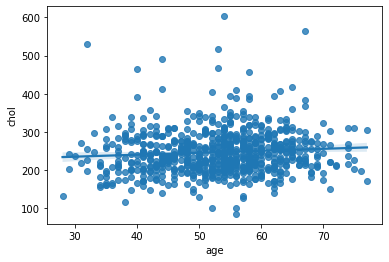

In [55]:
import seaborn as sns
sns.regplot(x=all_df['age'], y=all_df['chol'])

In [56]:
%%stata
regress chol age


      Source |       SS           df       MS      Number of obs   =       718
-------------+----------------------------------   F(1, 716)       =      5.01
       Model |    17052.75         1    17052.75   Prob > F        =    0.0256
    Residual |  2438971.19       716  3406.38435   R-squared       =    0.0069
-------------+----------------------------------   Adj R-squared   =    0.0056
       Total |  2456023.94       717  3425.41694   Root MSE        =    58.364

------------------------------------------------------------------------------
        chol | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .5154798   .2303888     2.24   0.026     .0631616    .9677981
       _cons |   219.5412   12.39072    17.72   0.000     195.2147    243.8676
------------------------------------------------------------------------------


In [57]:
%stata logit num chol


Iteration 0:   log likelihood = -497.20882  
Iteration 1:   log likelihood = -492.11506  
Iteration 2:   log likelihood = -492.11085  
Iteration 3:   log likelihood = -492.11085  

Logistic regression                                     Number of obs =    718
                                                        LR chi2(1)    =  10.20
                                                        Prob > chi2   = 0.0014
Log likelihood = -492.11085                             Pseudo R2     = 0.0103

------------------------------------------------------------------------------
         num | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        chol |   .0041715   .0013369     3.12   0.002     .0015512    .0067917
       _cons |  -1.101728   .3378293    -3.26   0.001    -1.763861   -.4395943
------------------------------------------------------------------------------


In [58]:
stata.run("melogit num age chol i.sex i.cp trestbps i.restecg i.exang||loc:, or") 


Fitting fixed-effects model:

Iteration 0:   log likelihood =  -297.9934  
Iteration 1:   log likelihood = -293.51154  
Iteration 2:   log likelihood = -293.49378  
Iteration 3:   log likelihood = -293.49377  

Refining starting values:

Grid node 0:   log likelihood = -297.97346

Fitting full model:

Iteration 0:   log likelihood = -297.97346  (not concave)
Iteration 1:   log likelihood = -296.94344  (not concave)
Iteration 2:   log likelihood = -295.91329  (not concave)
Iteration 3:   log likelihood = -294.69263  (not concave)
Iteration 4:   log likelihood = -294.08168  (not concave)
Iteration 5:   log likelihood = -293.80776  (not concave)
Iteration 6:   log likelihood = -293.56304  (not concave)
Iteration 7:   log likelihood = -293.51293  (not concave)
Iteration 8:   log likelihood = -293.50286  (not concave)
Iteration 9:   log likelihood = -293.50084  (not concave)
Iteration 10:  log likelihood = -293.50003  (not concave)
Iteration 11:  log likelihood = -293.49987  (not concave)


In [59]:
switz_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
count,123,123,123,121,0,48,122,122,122,117,106,5,71,123,123,123
mean,55,1,4,130,NaN,0,0,122,0,1,2,2,6,1,4,2
std,9,0,1,23,NaN,0,1,26,0,1,1,1,2,0,0,1
min,32,0,1,80,NaN,0,0,60,0,-3,1,1,3,0,4,0
25%,51,1,4,115,NaN,0,0,104,0,0,1,1,3,1,4,1
50%,56,1,4,125,NaN,0,0,121,0,0,2,2,7,1,4,2
75%,62,1,4,145,NaN,0,1,140,1,2,2,2,7,1,4,3
max,74,1,4,200,NaN,1,2,182,1,4,3,2,7,1,4,4


In [60]:
pd.crosstab(all_df['num'], all_df['sex'])

sex,0,1
num,,
0,144,267
1,50,459


In [61]:
all_df['sex'].value_counts()

1    726
0    194
Name: sex, dtype: int64

In [62]:
%%sql
SELECT AVG(age)
FROM all_table
WHERE loc=3

 * sqlite:///final_project.db
Done.


AVG(age)
47.826530612244895


In [63]:
%%sql
SELECT AVG(age)
FROM all_table

 * sqlite:///final_project.db
Done.


AVG(age)
53.51086956521739


In [64]:

all_df['num'].replace(0, 'Heart disease Absent', inplace=True)
all_df['num'].replace(1, 'Heart disease Present', inplace=True)
all_df['sex'].replace(0, 'Female', inplace=True)
all_df['sex'].replace(1, 'Male', inplace=True)


In [65]:
df = all_df['num'].groupby(all_df['sex']).value_counts()
df

sex     num                  
Female  Heart disease Absent     144
        Heart disease Present     50
Male    Heart disease Present    459
        Heart disease Absent     267
Name: num, dtype: int64

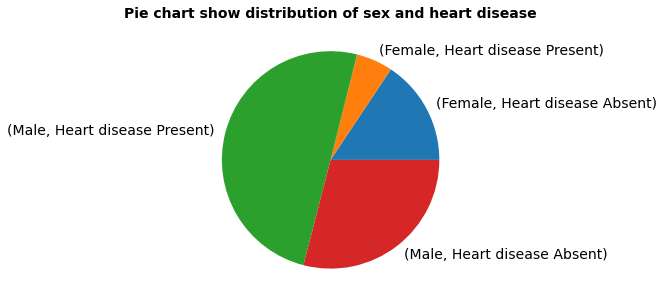

In [66]:
plot = df.plot.pie(y='num', figsize=(5,5), fontsize=14, rotatelabels=False)
plt.title('Pie chart show distribution of sex and heart disease', weight='bold', size=14)
plt.ylabel("")
plt.show()

In [67]:
%%stata
tab chol if loc ==4

no observations


In [68]:
pd.options.display.float_format = "{:,.0f}".format


In [69]:
%%sql
SELECT * FROM all_table

 * sqlite:///final_project.db
Done.


ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc,clas
1,63,1,4,140,260,0,1,112,1,3.0,2,None,None,1,1,2
2,44,1,4,130,209,0,1,127,0,0.0,None,None,None,0,1,0
3,60,1,4,132,218,0,1,140,1,1.5,3,None,None,1,1,2
4,55,1,4,142,228,0,1,149,1,2.5,1,None,None,1,1,1
5,66,1,3,110,213,1,2,99,1,1.3,2,None,None,0,1,0
6,66,1,3,120,None,0,1,120,0,-0.5,1,None,None,0,1,0
7,65,1,4,150,236,1,1,105,1,0.0,None,None,None,1,1,3
8,60,1,3,180,None,0,1,140,1,1.5,2,None,None,0,1,0
9,60,1,3,120,None,None,0,141,1,2.0,1,None,None,1,1,3
10,60,1,2,160,267,1,1,157,0,0.5,2,None,None,1,1,1
